**Bike Sharing Demand**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df_train = pd.read_csv('train.csv')
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
df_test = pd.read_csv('test.csv')
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [4]:
df = pd.read_csv('sampleSubmission.csv')
df.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


**Basic Data Exploration**

In [5]:
print("Train Data")
df_train.info()
print("Test Data")
df_test.info()
print("Sample Submission")
df.info()

Train Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
Test Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1

In [6]:
print("Train Data Description:")
print(df_train.describe())
print("Missing values in Train Data:")
print(df_train.isnull().sum())

Train Data Description:
             season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033   

In [7]:
print("Train Data Description:")
print(df_test.describe())
print("Missing values in Train Data:")
print(df_test.isnull().sum())

Train Data Description:
            season      holiday   workingday      weather         temp  \
count  6493.000000  6493.000000  6493.000000  6493.000000  6493.000000   
mean      2.493300     0.029108     0.685815     1.436778    20.620607   
std       1.091258     0.168123     0.464226     0.648390     8.059583   
min       1.000000     0.000000     0.000000     1.000000     0.820000   
25%       2.000000     0.000000     0.000000     1.000000    13.940000   
50%       3.000000     0.000000     1.000000     1.000000    21.320000   
75%       3.000000     0.000000     1.000000     2.000000    27.060000   
max       4.000000     1.000000     1.000000     4.000000    40.180000   

             atemp     humidity    windspeed  
count  6493.000000  6493.000000  6493.000000  
mean     24.012865    64.125212    12.631157  
std       8.782741    19.293391     8.250151  
min       0.000000    16.000000     0.000000  
25%      16.665000    49.000000     7.001500  
50%      25.000000    65.00

In [8]:
print("Sample Submission Head:")
print(df.head())

Sample Submission Head:
              datetime  count
0  2011-01-20 00:00:00      0
1  2011-01-20 01:00:00      0
2  2011-01-20 02:00:00      0
3  2011-01-20 03:00:00      0
4  2011-01-20 04:00:00      0


In [9]:
df_train = df_train.dropna()

In [10]:
df_train = df_train.drop_duplicates()

In [11]:
df_test = df_test.dropna()

In [12]:
df_test = df_test.drop_duplicates()

In [13]:
from scipy.stats import zscore
train_data = df_train[(np.abs(zscore(df_train.select_dtypes(include=[np.number]))) < 3).all(axis=1)]
test_data = df_test[(np.abs(zscore(df_test.select_dtypes(include=[np.number]))) < 3).all(axis=1)]
print(train_data.shape)
print(test_data.shape)

(9976, 12)
(6263, 9)


In [14]:
# prompt: encode cayegorical variables if applicable

categorical_features = ['season', 'holiday', 'workingday', 'weather']

# One-hot encode categorical features
train_data = pd.get_dummies(train_data, columns=categorical_features, drop_first=True)
test_data = pd.get_dummies(test_data, columns=categorical_features, drop_first=True)

# Check if the columns are the same in both dataframes after encoding
if list(train_data.columns) != list(test_data.columns):
    missing_cols = set(train_data.columns) - set(test_data.columns)
    for col in missing_cols:
        test_data[col] = 0
    test_data = test_data[train_data.columns]

print(train_data.shape)
test_data.shape

(9976, 14)


(6263, 14)

In [15]:
# prompt: rename column names

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
# **Bike Sharing Demand**
%matplotlib inline

df_train = pd.read_csv('train.csv')
df_train.head()
df_test = pd.read_csv('test.csv')
df_test.head()
df = pd.read_csv('sampleSubmission.csv')
df.head()
# **Basic Data Exploration**
print("Train Data")
df_train.info()
print("Test Data")
df_test.info()
print("Sample Submission")
df.info()
print("Train Data Description:")
print(df_train.describe())
print("Missing values in Train Data:")
print(df_train.isnull().sum())
print("Train Data Description:")
print(df_test.describe())
print("Missing values in Train Data:")
print(df_test.isnull().sum())
print("Sample Submission Head:")
print(df.head())
df_train = df_train.dropna()
df_train = df_train.drop_duplicates()
df_test = df_test.dropna()
df_test = df_test.drop_duplicates()
train_data = df_train[(np.abs(zscore(df_train.select_dtypes(include=[np.number]))) < 3).all(axis=1)]
test_data = df_test[(np.abs(zscore(df_test.select_dtypes(include=[np.number]))) < 3).all(axis=1)]
print(train_data.shape)
print(test_data.shape)

categorical_features = ['season', 'holiday', 'workingday', 'weather']

# One-hot encode categorical features
train_data = pd.get_dummies(train_data, columns=categorical_features, drop_first=True)
test_data = pd.get_dummies(test_data, columns=categorical_features, drop_first=True)

# Rename columns for clarity (example)
new_column_names = {
    'season_2': 'season_spring',
    'season_3': 'season_summer',
    'season_4': 'season_autumn',
    'weather_2': 'weather_misty',
    'weather_3': 'weather_light_rain',
    'weather_4': 'weather_heavy_rain'
    # Add more mappings as needed
}

train_data = train_data.rename(columns=new_column_names)
test_data = test_data.rename(columns=new_column_names)

# Check if the columns are the same in both dataframes after encoding
if list(train_data.columns) != list(test_data.columns):
    missing_cols = set(train_data.columns) - set(test_data.columns)
    for col in missing_cols:
        test_data[col] = 0
    test_data = test_data[train_data.columns]

print(train_data.shape)
test_data.shape

Train Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
Test Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1

(6263, 14)

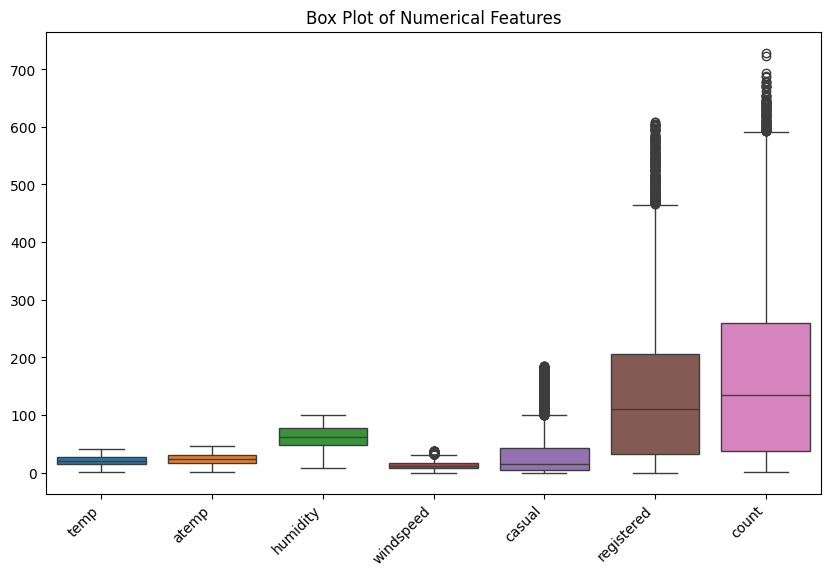

In [16]:


plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']])
plt.title('Box Plot of Numerical Features')
plt.xticks(rotation=45, ha='right')
plt.show()

In [17]:
# prompt: handle outlier

def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

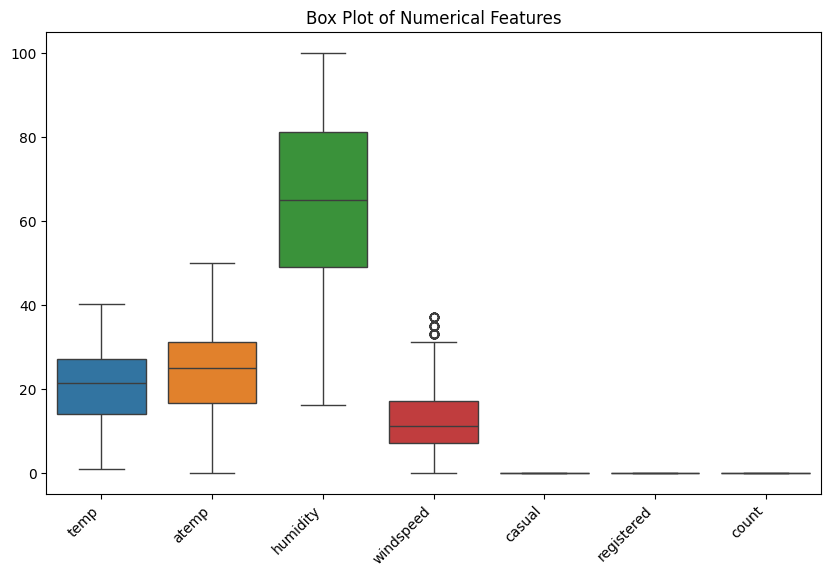

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=test_data[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']])
plt.title('Box Plot of Numerical Features')
plt.xticks(rotation=45, ha='right')
plt.show()

In [19]:
# Convert 'datetime' column to datetime format
df_train['datetime'] = pd.to_datetime(df_train['datetime'])
df_test['datetime'] = pd.to_datetime(df_test['datetime'])

# Extract features from the 'datetime' column
df_train['year'] = df_train['datetime'].dt.year
df_train['month'] = df_train['datetime'].dt.month
df_train['day'] = df_train['datetime'].dt.day
df_train['hour'] = df_train['datetime'].dt.hour
df_train['day_of_week'] = df_train['datetime'].dt.dayofweek
df_train['is_weekend'] = df_train['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

df_test['year'] = df_test['datetime'].dt.year
df_test['month'] = df_test['datetime'].dt.month
df_test['day'] = df_test['datetime'].dt.day
df_test['hour'] = df_test['datetime'].dt.hour
df_test['day_of_week'] = df_test['datetime'].dt.dayofweek
df_test['is_weekend'] = df_test['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)


In [20]:
print(df_train['datetime'].head())
print(df_test['datetime'].head())

0   2011-01-01 00:00:00
1   2011-01-01 01:00:00
2   2011-01-01 02:00:00
3   2011-01-01 03:00:00
4   2011-01-01 04:00:00
Name: datetime, dtype: datetime64[ns]
0   2011-01-20 00:00:00
1   2011-01-20 01:00:00
2   2011-01-20 02:00:00
3   2011-01-20 03:00:00
4   2011-01-20 04:00:00
Name: datetime, dtype: datetime64[ns]


In [21]:
from sklearn.preprocessing import StandardScaler

# Define the columns to scale
scale_features = ['temp', 'humidity', 'windspeed', 'atemp']

# Initialize the scaler
scaler = StandardScaler()

# Scale the features in the training data
df_train[scale_features] = scaler.fit_transform(df_train[scale_features])

# Scale the features in the test data using the same scaler fitted on the training data
df_test[scale_features] = scaler.transform(df_test[scale_features])

# Optional: Verify scaling
print(df_train[scale_features].describe())
print(df_test[scale_features].describe())


               temp      humidity     windspeed         atemp
count  1.088600e+04  1.088600e+04  1.088600e+04  1.088600e+04
mean   3.133020e-16  1.148774e-16 -5.221699e-17 -2.193114e-16
std    1.000046e+00  1.000046e+00  1.000046e+00  1.000046e+00
min   -2.491372e+00 -3.215858e+00 -1.567754e+00 -2.701736e+00
25%   -8.074281e-01 -7.735577e-01 -7.101642e-01 -8.248654e-01
50%    3.454398e-02  5.899992e-03  2.432639e-02  6.902305e-02
75%    7.712696e-01  7.853577e-01  5.142603e-01  8.738177e-01
max    2.665707e+00  1.980526e+00  5.413599e+00  2.572501e+00
              temp     humidity    windspeed        atemp
count  6493.000000  6493.000000  6493.000000  6493.000000
mean      0.050024     0.116334    -0.020607     0.042220
std       1.034443     1.002559     1.010532     1.036408
min      -2.491372    -2.384437    -1.567754    -2.791420
25%      -0.807428    -0.669630    -0.710164    -0.824865
50%       0.139790     0.161792    -0.220230     0.158707
75%       0.876516     0.993213     

**Target Variable Analysis (count)**

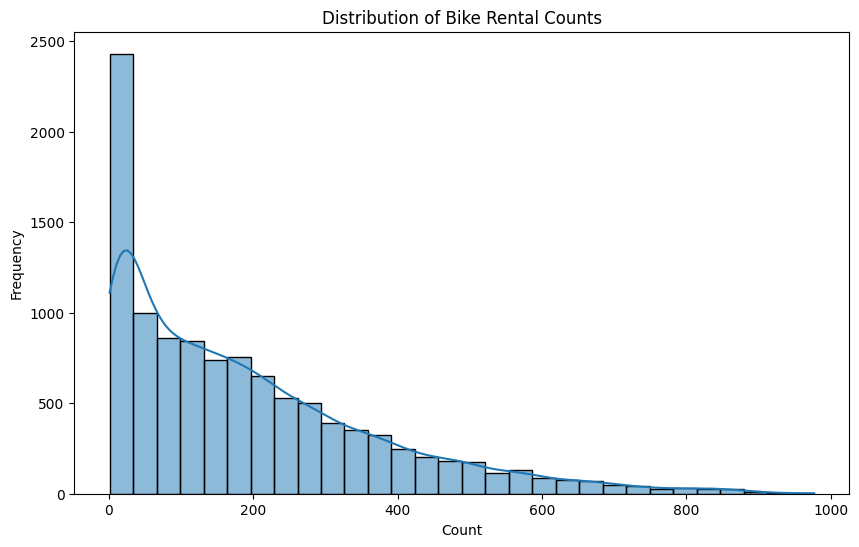

In [22]:
# Distribution of the target variable 'count'
plt.figure(figsize=(10, 6))
sns.histplot(df_train['count'], bins=30, kde=True)
plt.title('Distribution of Bike Rental Counts')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()


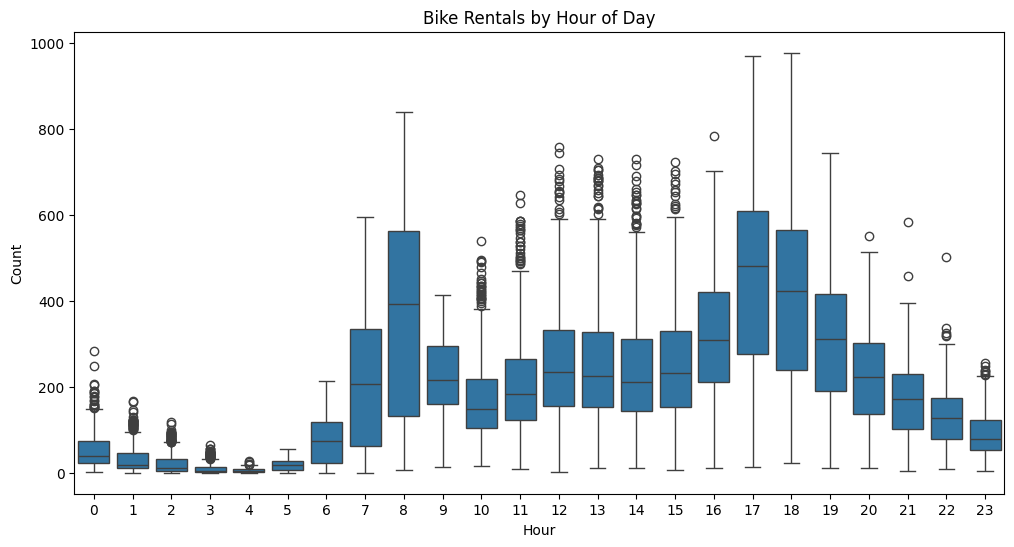

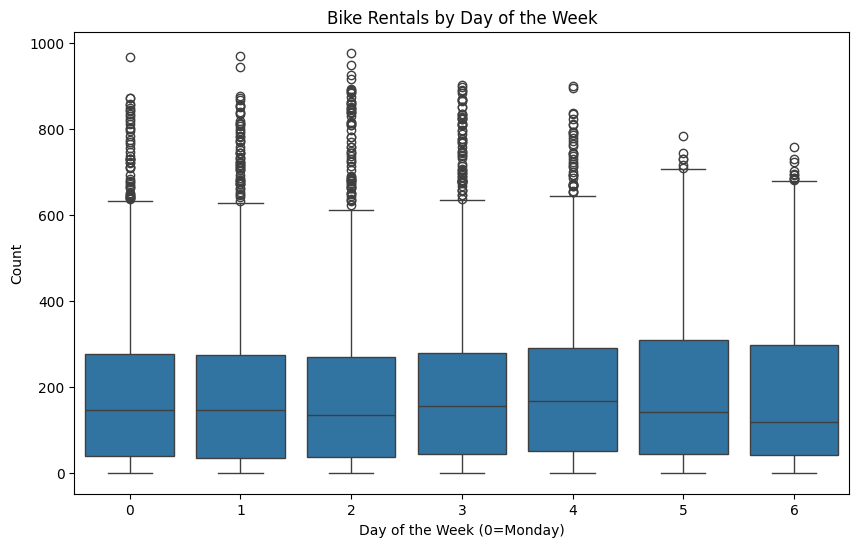

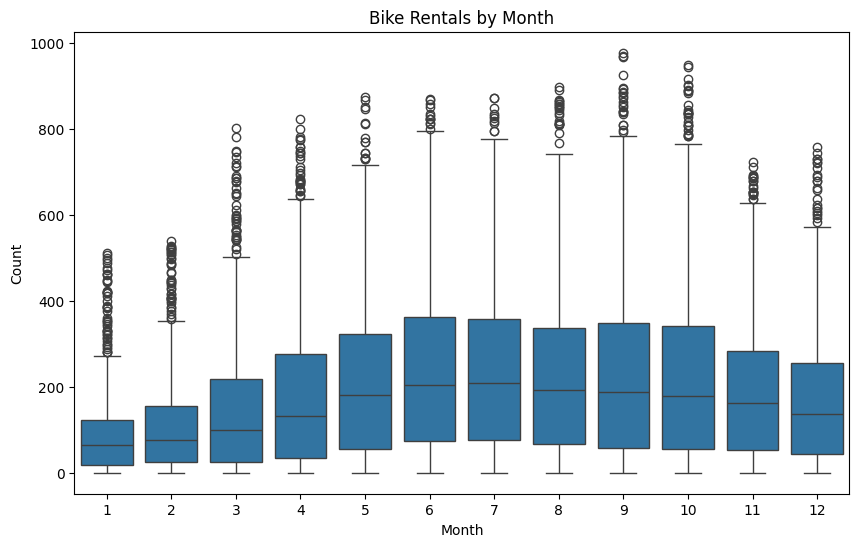

In [23]:
# Rentals by hour
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train, x='hour', y='count')
plt.title('Bike Rentals by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

# Rentals by day of the week
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_train, x='day_of_week', y='count')
plt.title('Bike Rentals by Day of the Week')
plt.xlabel('Day of the Week (0=Monday)')
plt.ylabel('Count')
plt.show()

# Rentals by month
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_train, x='month', y='count')
plt.title('Bike Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()


**Analyzing Categorical Features**
Season, Weather, Holiday, and Working Day

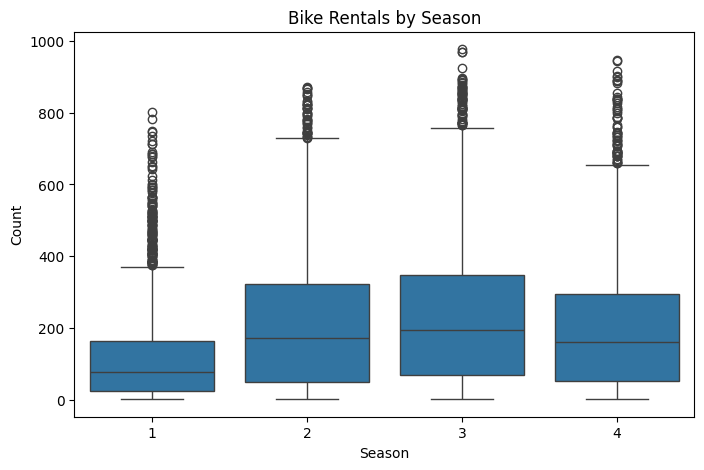

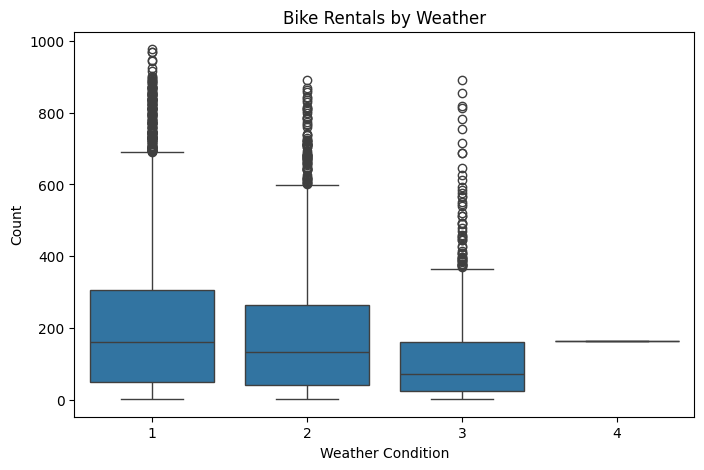

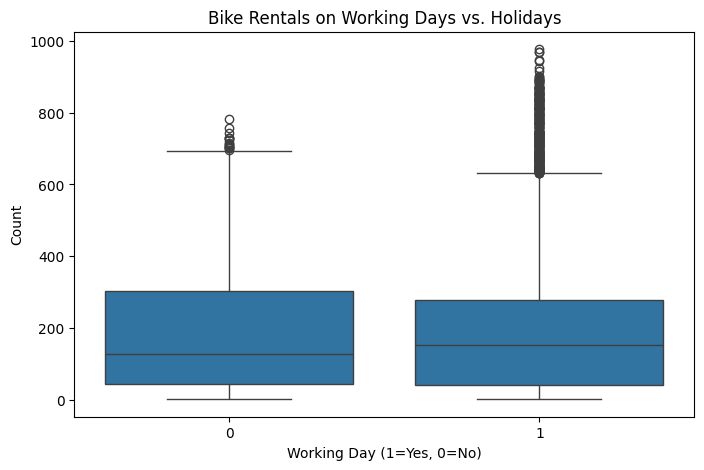

In [24]:
# Bike Rentals by Season
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_train, x='season', y='count')
plt.title('Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

# Bike Rentals by Weather Condition
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_train, x='weather', y='count')
plt.title('Bike Rentals by Weather')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.show()

# Bike Rentals on Working Days vs Holidays
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_train, x='workingday', y='count')
plt.title('Bike Rentals on Working Days vs. Holidays')
plt.xlabel('Working Day (1=Yes, 0=No)')
plt.ylabel('Count')
plt.show()


**Correlation Analysis**

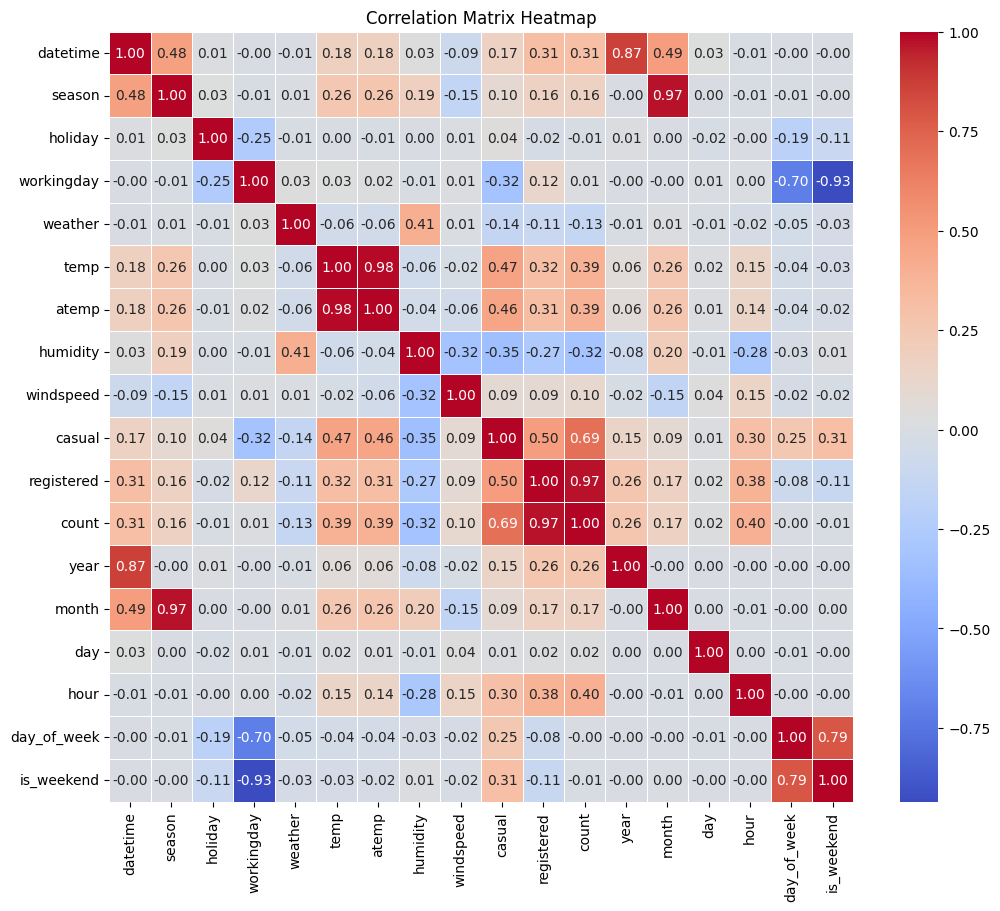

In [25]:

# Calculate the correlation matrix
correlation_matrix = df_train.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

**Exploring Relationships Between Features**
**Scatter Plots for Continuous Variables**

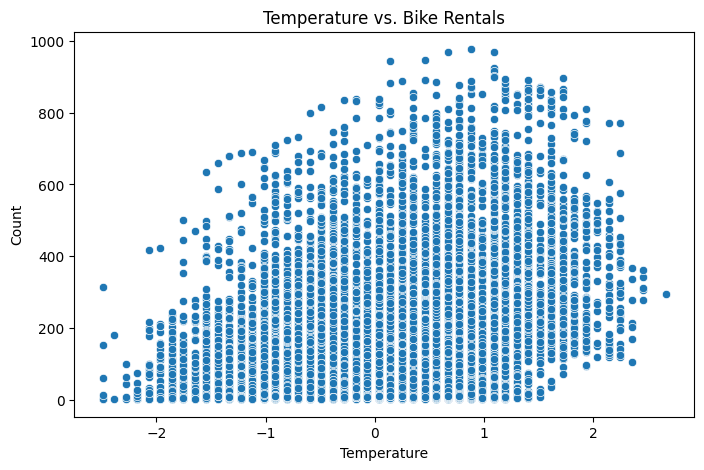

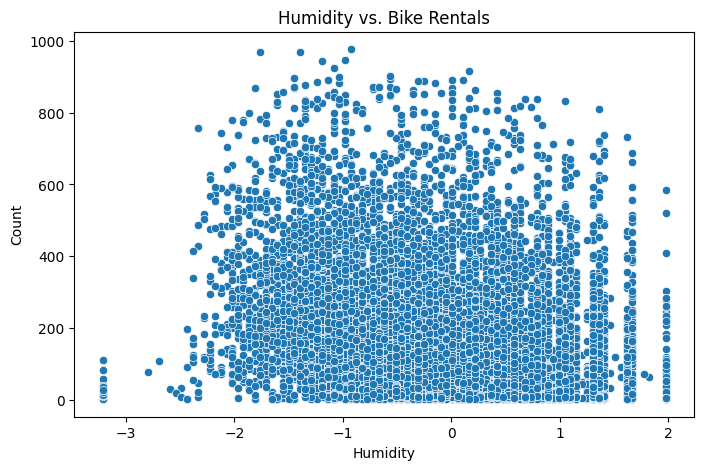

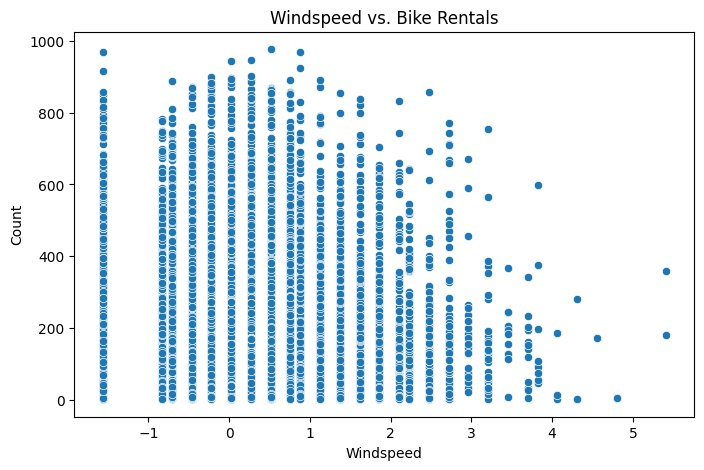

In [26]:
# Scatter plot of 'temp' vs. 'count'
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_train, x='temp', y='count')
plt.title('Temperature vs. Bike Rentals')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

# Scatter plot of 'humidity' vs. 'count'
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_train, x='humidity', y='count')
plt.title('Humidity vs. Bike Rentals')
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.show()

# Scatter plot of 'windspeed' vs. 'count'
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_train, x='windspeed', y='count')
plt.title('Windspeed vs. Bike Rentals')
plt.xlabel('Windspeed')
plt.ylabel('Count')
plt.show()


**Outlier Analysis**

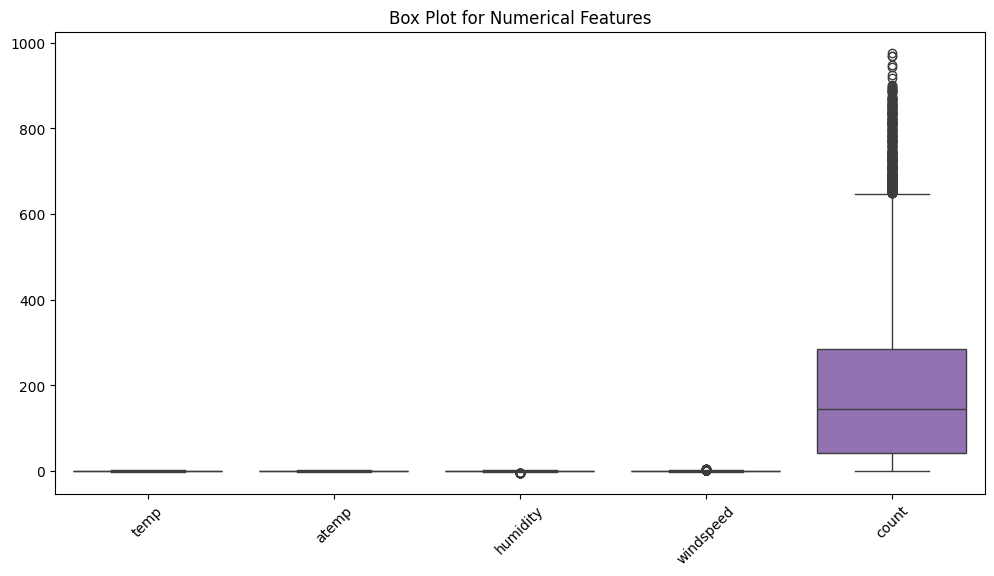

In [27]:
# Box plot to check for outliers in numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train[['temp', 'atemp', 'humidity', 'windspeed', 'count']])
plt.title('Box Plot for Numerical Features')
plt.xticks(rotation=45)
plt.show()


**Distribution of Rental Counts by User Type**

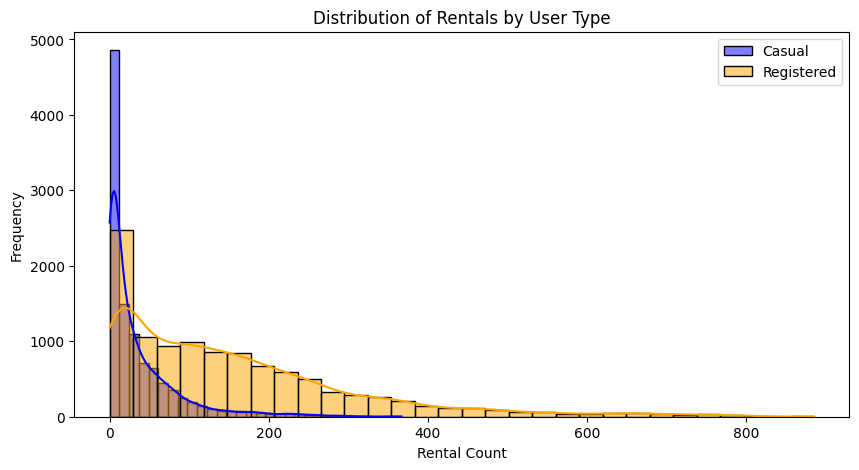

In [28]:
# Compare rentals by 'casual' and 'registered' users
plt.figure(figsize=(10, 5))
sns.histplot(df_train['casual'], bins=30, kde=True, color='blue', label='Casual')
sns.histplot(df_train['registered'], bins=30, kde=True, color='orange', label='Registered')
plt.title('Distribution of Rentals by User Type')
plt.xlabel('Rental Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Conclusion of EDA Findings
Summarize key insights from the EDA. These could include:

Trends in demand based on hour, day, and month.
Influence of weather, temperature, and humidity on bike rentals.
Any significant correlations or patterns observed in the data.

In [29]:
# Check for missing values
print("Missing values in Train Data:", df_train.isnull().sum())
print("Missing values in Test Data:", df_test.isnull().sum())

# Drop duplicates if any
df_train = df_train.drop_duplicates()
df_test = df_test.drop_duplicates()


Missing values in Train Data: datetime       0
season         0
holiday        0
workingday     0
weather        0
temp           0
atemp          0
humidity       0
windspeed      0
casual         0
registered     0
count          0
year           0
month          0
day            0
hour           0
day_of_week    0
is_weekend     0
dtype: int64
Missing values in Test Data: datetime       0
season         0
holiday        0
workingday     0
weather        0
temp           0
atemp          0
humidity       0
windspeed      0
year           0
month          0
day            0
hour           0
day_of_week    0
is_weekend     0
dtype: int64


In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Define numerical features for scaling and PCA (excluding target variable 'count')
numerical_features = ['temp', 'humidity', 'windspeed', 'atemp', 'year', 'month', 'day', 'hour', 'day_of_week', 'is_weekend']

# Ensure df_train and df_test contain only the necessary features
scaler = StandardScaler()
df_train_scaled = scaler.fit_transform(df_train[numerical_features])
df_test_scaled = scaler.transform(df_test[numerical_features])

# Apply PCA to explain 95% of variance
pca = PCA(n_components=0.95)

# Fit PCA on the standardized training data
df_train_pca = pca.fit_transform(df_train_scaled)
print("Shape after PCA (training):", df_train_pca.shape)

# Transform test data using the same PCA fit
df_test_pca = pca.transform(df_test_scaled)
print("Shape after PCA (test):", df_test_pca.shape)

# Optional: Check explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component:", explained_variance)
print("Total explained variance:", explained_variance.sum())


Shape after PCA (training): (10886, 8)
Shape after PCA (test): (6493, 8)
Explained variance by each component: [0.21613898 0.17857016 0.15903704 0.10104612 0.10013293 0.08432477
 0.07832001 0.06051258]
Total explained variance: 0.9780825941932049


In [31]:
# prompt: which training model is best suited for this implement it

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming 'df_train_pca' and 'df_test_pca' are your PCA-transformed data
# and 'df_train['count']' is your target variable

# Split the training data
X = df_train_pca
y = df_train['count']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust hyperparameters as needed
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"Validation RMSE: {rmse}")

# Make predictions on the test data
test_predictions = model.predict(df_test_pca)

# Create a submission DataFrame
submission_df = pd.DataFrame({'datetime': df_test['datetime'], 'count': test_predictions})

# Save the predictions to a CSV file
submission_df.to_csv("submission.csv", index=False)

Validation RMSE: 102.77029843090655


To determine the best model for predicting bike sharing demand, we can evaluate several regression models. Given that we have a continuous target variable (count), suitable models for this task include:

Linear Regression: A basic model that serves as a good starting point.
Random Forest Regressor: An ensemble method that can capture non-linear relationships and is robust to overfitting.

**Linear Regression Implementation**

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Split the data into features and target variable
X = df_train_pca  # Use PCA transformed features
y = df_train['count']  # Target variable

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_val)

# Evaluate the model
mae_linear = mean_absolute_error(y_val, y_pred_linear)
r2_linear = r2_score(y_val, y_pred_linear)

# Display results
print("Linear Regression Results:")
print(f"Mean Absolute Error: {mae_linear:.2f}")
print(f"R-squared: {r2_linear:.2f}")


Linear Regression Results:
Mean Absolute Error: 105.15
R-squared: 0.40


**Random Forest Regressor Implementation**

In [33]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = random_forest_model.predict(X_val)

# Evaluate the model
mae_rf = mean_absolute_error(y_val, y_pred_rf)
r2_rf = r2_score(y_val, y_pred_rf)

# Display results
print("\nRandom Forest Regressor Results:")
print(f"Mean Absolute Error: {mae_rf:.2f}")
print(f"R-squared: {r2_rf:.2f}")



Random Forest Regressor Results:
Mean Absolute Error: 70.45
R-squared: 0.68


**Model Testing**

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming X (features) and y (target) are defined
X = df_train_pca  # PCA-transformed training features
y = df_train['count']  # Target variable (count of bike rentals)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_linear = linear_model.predict(X_test)

# Model 1 Evaluation
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression Model Test Performance:")
print("Mean Absolute Error (MAE):", mae_linear)
print("R-squared (R2):", r2_linear)

# Model 2: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Model 2 Evaluation
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor Model Test Performance:")
print("Mean Absolute Error (MAE):", mae_rf)
print("R-squared (R2):", r2_rf)

# Determine the best model based on MAE and R2
if mae_rf < mae_linear and r2_rf > r2_linear:
    print("\nRandom Forest Regressor is the best model for testing.")
else:
    print("\nLinear Regression is the best model for testing.")


Linear Regression Model Test Performance:
Mean Absolute Error (MAE): 105.14508297876534
R-squared (R2): 0.3960725693588245

Random Forest Regressor Model Test Performance:
Mean Absolute Error (MAE): 70.45312213039486
R-squared (R2): 0.6800147010687718

Random Forest Regressor is the best model for testing.



Since a classification report is usually applied to classification tasks rather than regression, we typically wouldn’t generate one for a regression task like bike rental demand prediction (where the target variable is continuous). However, a similar evaluation approach, we can use other performance metrics specific to regression, such as Mean Squared Error (MSE), Mean Absolute Error (MAE), R-squared (R2), etc.

However, converting this regression problem into a classification problem (e.g., predicting demand categories instead of exact counts), we could create demand ranges or classes. For instance:

Low Demand
Medium Demand
High Demand

In [41]:
# Define bins for categorizing demand
bins = [0, 100, 300, 1000]  # Adjust based on your data distribution
labels = ['Low Demand', 'Medium Demand', 'High Demand']

# Create a new column for demand categories
df_train['demand_category'] = pd.cut(df_train['count'], bins=bins, labels=labels)


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Features and new target
X = df_train_pca  # PCA-transformed training features
y = df_train['demand_category']  # Categorical target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_classifier.predict(X_test)

# Classification Report for Random Forest
print("Random Forest Classifier Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Model 2: Logistic Regression (for comparison)
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Predictions
y_pred_logistic = logistic_model.predict(X_test)

# Classification Report for Logistic Regression
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic))


Random Forest Classifier Classification Report:
               precision    recall  f1-score   support

  High Demand       0.73      0.68      0.70       483
   Low Demand       0.82      0.89      0.86       852
Medium Demand       0.72      0.68      0.70       843

     accuracy                           0.76      2178
    macro avg       0.76      0.75      0.75      2178
 weighted avg       0.76      0.76      0.76      2178


Logistic Regression Classification Report:
               precision    recall  f1-score   support

  High Demand       0.65      0.45      0.53       483
   Low Demand       0.72      0.82      0.77       852
Medium Demand       0.61      0.63      0.62       843

     accuracy                           0.66      2178
    macro avg       0.66      0.63      0.64      2178
 weighted avg       0.66      0.66      0.66      2178

